### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import model_selection

In [2]:
df = pd.read_excel('input_model.xlsx')

In [3]:
df.head()

,log_limit_bal,log_age,sex,marriage,education,sep_status,aug_status,jul_status,jun_status,may_status,apr_status,default
0,9.903488,3.178054,2,1,2,2,2,0,0,0,0,1
1,11.695247,3.258097,2,2,2,0,2,0,0,0,2,1
2,11.407565,3.526361,2,2,2,0,0,0,0,0,0,0
3,10.819778,3.610918,2,1,2,0,0,0,0,0,0,0
4,10.819778,4.043051,1,1,2,0,0,0,0,0,0,0


#### Converting the catgorical variables to dummy varibales

In [4]:
df = pd.get_dummies(df,prefix=['sex','marriage','education','sep_status','aug_status','jul_status','jun_status','may_status','apr_status'],columns=['sex','marriage','education','sep_status','aug_status','jul_status','jun_status','may_status','apr_status'])

In [5]:
df.head()

,log_limit_bal,log_age,default,sex_1,sex_2,marriage_1,marriage_2,marriage_3,education_1,education_2,...,may_status_7,may_status_8,apr_status_0,apr_status_2,apr_status_3,apr_status_4,apr_status_5,apr_status_6,apr_status_7,apr_status_8
0,9.903488,3.178054,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,11.695247,3.258097,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,11.407565,3.526361,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,10.819778,3.610918,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,10.819778,4.043051,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [6]:
x = df.drop('default',axis=1)

In [7]:
y = df[['default']]
y.head()

,default
0,1
1,1
2,0
3,0
4,0


#### Modeling

#### Splitting the dataset into training and test data set

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
classifier = RandomForestClassifier(n_jobs=-1)
param_grid = {
         'n_estimators':[100,200,250,300,400,500],
          'max_depth':[1,2,5,7,11,15],
          'criterion':['gini','entropy']
}

#### Using Gridsearchcv to fin the correct hyperameter to our model

In [10]:
model = model_selection.GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        scoring='recall',
        verbose=10,
        n_jobs=1,
        cv=5)

In [11]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.067, total=   5.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.073, total=   0.7s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.034, total=   0.7s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.065, total=   0.7s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.2s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.000, total=   0.7s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   0.9s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.8s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   1.0s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.8s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   1.0s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.8s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   1.0s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.8s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   0.9s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   0.7s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   1.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   1.1s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   1.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   1.3s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   1.3s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   1.5s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   1.4s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   1.4s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   1.4s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   1.6s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   1.6s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   1.3s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   1.7s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   1.7s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   1.9s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   2.0s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   2.0s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   2.2s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   1.9s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.166, total=   0.6s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.166, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.167, total=   0.5s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.169, total=   0.6s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.169, total=   0.8s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.186, total=   0.8s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.160, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.169, total=   0.8s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.157, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.166, total=   0.9s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.181, total=   1.1s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.167, total=   1.3s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.172, total=   1.3s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.156, total=   1.2s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.174, total=   1.3s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.180, total=   1.2s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.165, total=   1.4s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.164, total=   1.4s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.160, total=   0.9s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.166, total=   1.3s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.173, total=   1.6s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.170, total=   1.7s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.167, total=   1.7s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.158, total=   1.7s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.162, total=   1.8s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.183, total=   1.9s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.169, total=   2.1s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.170, total=   2.0s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.164, total=   1.8s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.162, total=   2.1s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.293, total=   0.6s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.301, total=   0.8s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.284, total=   0.8s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.287, total=   0.7s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.284, total=   0.7s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.294, total=   1.0s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.300, total=   1.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.283, total=   1.1s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.288, total=   1.1s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.290, total=   1.1s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.294, total=   1.3s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.311, total=   1.2s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.282, total=   1.1s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.295, total=   1.4s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.293, total=   1.4s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.296, total=   1.4s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.312, total=   1.5s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.287, total=   1.5s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.287, total=   1.5s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.289, total=   1.6s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.297, total=   1.8s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.301, total=   1.9s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.278, total=   1.7s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.289, total=   1.9s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.294, total=   1.9s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.299, total=   2.2s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.305, total=   2.3s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.285, total=   2.3s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.288, total=   2.3s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.287, total=   2.2s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.358, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.361, total=   0.7s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.323, total=   0.9s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.329, total=   0.8s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.360, total=   0.8s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.340, total=   1.1s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.389, total=   1.2s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.317, total=   1.2s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.353, total=   1.1s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.365, total=   1.3s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.347, total=   1.3s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.363, total=   1.5s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.337, total=   1.6s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.339, total=   1.5s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.347, total=   1.1s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.340, total=   1.5s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.382, total=   1.6s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.340, total=   1.6s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.356, total=   1.6s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.345, total=   1.6s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.348, total=   1.9s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.348, total=   2.3s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.328, total=   2.1s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.345, total=   1.7s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.329, total=   1.9s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.352, total=   2.3s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.356, total=   2.4s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.330, total=   2.5s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.352, total=   2.4s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.324, total=   2.6s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.361, total=   0.7s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.384, total=   0.7s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.345, total=   0.7s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.347, total=   0.8s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.364, total=   0.8s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.358, total=   1.2s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.388, total=   1.4s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.348, total=   1.4s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.350, total=   1.3s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.365, total=   1.4s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.356, total=   1.6s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.387, total=   1.6s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.353, total=   1.7s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.351, total=   1.7s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.366, total=   1.3s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.359, total=   1.8s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.395, total=   2.0s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.356, total=   1.9s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.349, total=   1.9s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.363, total=   1.9s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.359, total=   2.3s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.395, total=   2.4s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.347, total=   1.9s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.347, total=   2.4s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.363, total=   2.3s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.361, total=   2.8s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.390, total=   2.9s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.347, total=   2.9s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.350, total=   2.5s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.368, total=   3.5s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.352, total=   0.8s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.373, total=   0.9s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.349, total=   1.0s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.344, total=   0.9s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.354, total=   0.9s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.357, total=   1.5s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.369, total=   1.5s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.349, total=   1.6s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.333, total=   1.6s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.354, total=   1.2s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.356, total=   1.8s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.372, total=   2.0s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.351, total=   1.9s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.345, total=   1.9s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.361, total=   1.9s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.355, total=   2.1s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.374, total=   2.3s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.349, total=   2.1s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.338, total=   2.2s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.358, total=   2.4s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.353, total=   2.7s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.377, total=   2.8s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.353, total=   2.8s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.341, total=   2.7s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.354, total=   2.6s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.358, total=   3.3s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.370, total=   3.6s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.347, total=   3.4s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.337, total=   3.2s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.360, total=   3.2s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.000, total=   0.9s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.000, total=   1.0s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.000, total=   1.0s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.000, total=   1.0s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.041, total=   1.0s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.000, total=   1.1s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.000, total=   1.2s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.000, total=   1.2s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.067, total=   0.8s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.000, total=   1.0s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   0.9s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   1.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   1.3s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   1.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   1.2s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   1.2s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   1.6s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   1.6s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   1.7s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   1.7s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   1.2s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   1.9s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   2.0s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   1.9s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   1.9s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.177, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.172, total=   0.8s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.169, total=   0.7s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.192, total=   0.7s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.201, total=   0.7s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.167, total=   0.9s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.168, total=   1.0s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.167, total=   1.0s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.160, total=   1.0s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.166, total=   0.7s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.178, total=   0.9s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.164, total=   1.9s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.159, total=   1.4s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.160, total=   1.2s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.171, total=   1.3s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.185, total=   1.2s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.164, total=   1.4s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.156, total=   1.1s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.159, total=   1.4s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.164, total=   1.3s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.168, total=   1.2s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.159, total=   1.2s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.169, total=   1.3s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.168, total=   1.8s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.162, total=   1.6s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.178, total=   1.9s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.175, total=   2.0s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.169, total=   2.0s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.160, total=   2.1s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.168, total=   2.0s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.298, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.298, total=   0.7s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.293, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.281, total=   0.7s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.292, total=   0.8s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.295, total=   1.0s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.315, total=   1.1s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.286, total=   1.1s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.292, total=   1.1s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.281, total=   1.2s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.296, total=   1.2s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.307, total=   1.6s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.286, total=   1.4s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.287, total=   1.4s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.288, total=   1.4s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.297, total=   1.4s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.305, total=   1.1s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.281, total=   1.5s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.292, total=   1.5s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.284, total=   1.5s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.294, total=   1.8s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.308, total=   1.9s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.277, total=   1.7s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.288, total=   1.7s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.293, total=   1.6s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.294, total=   2.0s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.307, total=   2.0s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.281, total=   2.1s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.291, total=   2.3s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.294, total=   2.2s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.355, total=   0.6s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.377, total=   0.8s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.332, total=   0.8s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.336, total=   0.8s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.323, total=   0.8s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.340, total=   1.1s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.366, total=   1.2s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.323, total=   1.3s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.345, total=   1.0s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.332, total=   1.2s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.339, total=   1.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.366, total=   1.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.335, total=   1.5s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.356, total=   1.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.326, total=   1.5s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.353, total=   1.6s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.366, total=   1.6s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.330, total=   1.6s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.342, total=   1.6s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.349, total=   1.1s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.341, total=   1.9s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.359, total=   2.0s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.335, total=   2.1s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.349, total=   2.0s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.328, total=   2.1s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.345, total=   2.3s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.344, total=   2.6s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.327, total=   2.1s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.344, total=   2.3s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.328, total=   2.4s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.361, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.391, total=   0.8s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.344, total=   0.9s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.353, total=   0.8s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.364, total=   0.8s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.359, total=   1.4s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.388, total=   1.3s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.344, total=   1.3s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.351, total=   1.2s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.365, total=   1.0s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.358, total=   1.5s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.389, total=   1.6s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.347, total=   1.7s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.352, total=   1.6s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.364, total=   1.6s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.361, total=   1.8s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.394, total=   1.9s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.350, total=   1.9s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.352, total=   1.7s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.364, total=   1.6s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.356, total=   2.3s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.395, total=   2.3s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.348, total=   2.4s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.351, total=   2.4s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.367, total=   2.6s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.358, total=   2.6s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.390, total=   2.7s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.353, total=   2.8s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.354, total=   3.0s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.363, total=   3.0s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.364, total=   0.8s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.376, total=   1.0s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.348, total=   1.0s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.345, total=   0.8s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.362, total=   0.7s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.351, total=   1.4s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.377, total=   1.7s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.346, total=   1.5s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.336, total=   1.6s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.358, total=   1.5s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.358, total=   1.9s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.380, total=   2.0s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.347, total=   2.0s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.339, total=   1.7s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.356, total=   1.7s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.354, total=   2.2s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.373, total=   2.1s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.354, total=   2.1s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.336, total=   2.2s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.356, total=   2.2s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.357, total=   2.8s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.377, total=   2.4s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.349, total=   2.5s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.336, total=   2.6s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.359, total=   3.0s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.357, total=   3.4s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.379, total=   3.1s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.353, total=   3.3s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.339, total=   3.8s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.355, total=   3.8s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  9.5min finished
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [12]:
print(model.best_score_)
best_parameters =  model.best_estimator_.get_params()
for i in sorted(param_grid.keys()):
    print(f'\t{i}:{best_parameters[i]}')

0.36416483914559206
	criterion:gini
	max_depth:11
	n_estimators:300


In [13]:
preds = model.predict(x_test)

In [14]:
from sklearn import metrics

In [15]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4672
           1       0.66      0.36      0.47      1328

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### We see the model did not do a satisfying job

In [16]:
metrics.confusion_matrix(y_test,preds)

array([[4428,  244],
       [ 851,  477]], dtype=int64)

In [17]:
metrics.recall_score(y_test,preds)  # recall is very low

0.35918674698795183

In [18]:
metrics.roc_auc_score(y_test,preds)

0.6534803597953458

### Since we have imbalanced dataset,the model did not do a satisfying job in its entirety with the whole data.Lets do some resampling techniques so that the both classes of predictive variable will be balanced and may improve our model score.
### Lets do oversampling and undersampling procedures

#### Upsampling

In [19]:
x_train_rg,x_test_rg,y_train_rg,y_test_rg = train_test_split(x,y,test_size=0.2,random_state=42)


In [20]:
x_train_u,y_train_u = resample(x_train_rg[y_train_rg.default==1],y_train_rg[y_train_rg.default==1],replace=True,
                               n_samples=x_train_rg[y_train_rg.default==0].shape[0],random_state=1
                                )

In [21]:
x_train_u = np.concatenate((x_train_rg[y_train_rg.default==0],x_train_u))
y_train_u = np.concatenate((y_train_rg[y_train_rg.default==0],y_train_u))

In [22]:
up_classifier = RandomForestClassifier(n_jobs=-1)
param_grid = {
         'n_estimators':[100,200,250,300,400,500],
          'max_depth':[1,2,5,7,11,15],
          'criterion':['gini','entropy']
}

In [23]:
up_model = model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring='recall',
            verbose=10,
            n_jobs=1,
            cv=5)

In [24]:
up_model.fit(x_train_u,y_train_u)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.535, total=   0.7s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.540, total=   0.7s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.509, total=   0.8s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.507, total=   0.7s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.502, total=   0.8s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.523, total=   1.1s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.534, total=   1.1s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.9s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.514, total=   1.1s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.0s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.517, total=   1.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.3s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.539, total=   1.2s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.526, total=   1.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.530, total=   1.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.537, total=   1.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.511, total=   1.2s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.530, total=   1.2s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.522, total=   1.7s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.532, total=   1.7s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.515, total=   1.6s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.522, total=   1.5s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.513, total=   1.5s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.514, total=   1.4s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.540, total=   1.2s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.514, total=   1.2s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.517, total=   1.9s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.512, total=   1.6s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.514, total=   2.1s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.540, total=   2.2s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.517, total=   2.3s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.506, total=   2.2s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.513, total=   2.1s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.526, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.539, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.530, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.593, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.543, total=   0.7s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.535, total=   0.9s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.534, total=   0.9s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.518, total=   1.1s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.548, total=   1.1s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.520, total=   1.3s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.520, total=   1.5s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.540, total=   1.6s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.517, total=   1.7s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.515, total=   1.4s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.518, total=   1.4s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.531, total=   1.6s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.536, total=   1.6s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.516, total=   1.2s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.528, total=   1.6s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.514, total=   1.6s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.539, total=   2.1s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.544, total=   2.0s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.531, total=   2.1s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.518, total=   2.2s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.532, total=   2.0s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.565, total=   2.3s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.537, total=   2.1s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.536, total=   2.4s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.515, total=   2.6s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.519, total=   2.5s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.563, total=   1.0s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.618, total=   0.8s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.571, total=   0.8s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.571, total=   0.8s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.570, total=   0.8s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.574, total=   1.4s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.620, total=   1.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.599, total=   1.4s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.595, total=   1.5s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.610, total=   1.5s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.586, total=   2.0s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.605, total=   1.8s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.573, total=   1.8s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.585, total=   1.8s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.586, total=   1.8s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.586, total=   2.0s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.598, total=   1.9s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.593, total=   2.0s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.574, total=   2.1s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.591, total=   2.1s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.593, total=   2.7s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.588, total=   2.7s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.581, total=   2.5s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.595, total=   2.4s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.577, total=   2.6s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.582, total=   3.5s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.593, total=   2.9s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.597, total=   3.4s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.578, total=   2.8s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.578, total=   3.4s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.612, total=   1.0s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.606, total=   0.9s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.614, total=   0.9s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.618, total=   0.9s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.590, total=   0.9s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.589, total=   1.6s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.605, total=   1.7s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.600, total=   1.7s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.611, total=   1.4s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.605, total=   1.4s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.593, total=   2.1s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.614, total=   2.0s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.609, total=   2.1s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.605, total=   2.0s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.604, total=   2.1s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.608, total=   2.7s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.608, total=   2.0s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.606, total=   2.2s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.615, total=   2.3s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.593, total=   2.3s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.609, total=   3.3s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.619, total=   3.0s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.595, total=   2.7s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.614, total=   2.7s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.608, total=   3.0s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.597, total=   3.7s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.613, total=   3.7s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.601, total=   3.6s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.603, total=   3.6s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.601, total=   3.7s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.626, total=   1.1s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.626, total=   1.1s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.627, total=   1.0s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.631, total=   1.1s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.612, total=   1.0s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.616, total=   1.8s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.627, total=   1.7s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.625, total=   1.9s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.627, total=   1.9s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.613, total=   1.9s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.620, total=   2.4s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.628, total=   2.3s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.627, total=   2.6s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.629, total=   2.1s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.616, total=   2.3s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.619, total=   2.9s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.628, total=   2.9s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.622, total=   2.9s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.629, total=   2.9s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.616, total=   2.3s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.621, total=   3.6s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.627, total=   3.7s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.626, total=   3.7s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.625, total=   3.5s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.615, total=   3.2s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.623, total=   4.6s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.624, total=   4.6s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.624, total=   4.7s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.627, total=   4.1s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.616, total=   4.7s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.655, total=   1.2s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.658, total=   1.2s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.655, total=   1.3s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.654, total=   1.2s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.644, total=   1.1s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.655, total=   2.3s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.661, total=   2.3s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.654, total=   2.3s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.655, total=   2.3s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.643, total=   2.3s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.657, total=   2.9s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.659, total=   2.7s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.656, total=   2.7s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.653, total=   2.4s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.645, total=   1.9s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.654, total=   2.9s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.662, total=   3.5s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.654, total=   3.1s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.655, total=   3.2s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.644, total=   3.3s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.654, total=   4.4s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.658, total=   4.1s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.653, total=   4.3s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.652, total=   4.3s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.643, total=   4.3s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.652, total=   5.2s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.661, total=   5.6s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.653, total=   5.3s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.654, total=   5.3s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.643, total=   5.6s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.535, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.604, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.544, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.514, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.514, total=   0.7s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.508, total=   1.2s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.540, total=   1.1s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.501, total=   1.0s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.530, total=   0.8s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.508, total=   0.8s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.515, total=   1.3s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.530, total=   1.3s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.515, total=   1.2s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.511, total=   1.3s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.512, total=   1.3s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.522, total=   1.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.537, total=   1.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.525, total=   1.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.515, total=   1.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.510, total=   1.4s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.514, total=   1.5s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.535, total=   1.4s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.518, total=   1.7s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.531, total=   1.7s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.513, total=   1.8s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.519, total=   2.1s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.534, total=   2.3s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.510, total=   2.1s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.513, total=   1.9s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.513, total=   1.3s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.590, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.540, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.514, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.552, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.534, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.535, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.535, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.515, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.520, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.519, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.526, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.539, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.524, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.515, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.535, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.519, total=   0.8s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.540, total=   0.8s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.517, total=   0.7s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.519, total=   0.8s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.518, total=   0.7s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.536, total=   1.0s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.534, total=   0.9s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.519, total=   1.0s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.519, total=   0.9s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.525, total=   1.0s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.521, total=   1.2s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.540, total=   1.2s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.530, total=   1.2s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.522, total=   1.2s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.520, total=   1.2s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.583, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.610, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.589, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.604, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.571, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.585, total=   0.7s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.584, total=   0.7s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.581, total=   0.8s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.606, total=   0.7s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.562, total=   0.7s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.578, total=   0.9s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.589, total=   0.9s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.563, total=   1.0s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.589, total=   0.9s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.578, total=   0.9s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.611, total=   1.0s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.604, total=   1.0s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.591, total=   1.0s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.589, total=   1.0s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.606, total=   1.0s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.571, total=   1.5s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.599, total=   1.3s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.587, total=   1.3s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.593, total=   1.4s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.572, total=   1.3s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.598, total=   1.7s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.604, total=   1.8s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.559, total=   1.7s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.610, total=   1.7s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.574, total=   1.7s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.612, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.619, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.603, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.609, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.602, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.592, total=   0.8s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.621, total=   0.8s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.611, total=   0.8s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.616, total=   0.9s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.609, total=   0.8s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.602, total=   1.0s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.617, total=   1.0s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.606, total=   1.1s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.608, total=   1.1s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.590, total=   1.0s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.610, total=   1.2s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.613, total=   1.2s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.609, total=   1.2s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.613, total=   1.5s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.600, total=   1.2s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.598, total=   1.6s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.617, total=   1.5s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.605, total=   1.6s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.611, total=   1.5s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.597, total=   1.7s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.600, total=   1.9s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.617, total=   1.9s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.599, total=   2.0s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.610, total=   1.9s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.598, total=   1.9s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.613, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.631, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.619, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.629, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.623, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.619, total=   1.0s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.626, total=   1.0s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.625, total=   1.1s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.626, total=   1.0s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.614, total=   1.0s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.618, total=   1.2s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.625, total=   1.3s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.628, total=   1.2s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.628, total=   1.2s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.616, total=   1.2s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.623, total=   1.4s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.628, total=   1.8s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.626, total=   1.4s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.627, total=   1.4s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.618, total=   1.5s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.621, total=   2.0s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.627, total=   1.9s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.627, total=   2.1s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.630, total=   1.9s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.613, total=   2.0s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.627, total=   2.4s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.629, total=   2.4s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.624, total=   2.5s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.628, total=   2.4s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.613, total=   2.4s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.651, total=   0.7s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.657, total=   0.7s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.649, total=   0.7s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.655, total=   0.7s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.641, total=   0.7s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.650, total=   1.2s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.654, total=   1.2s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.653, total=   1.2s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.653, total=   1.2s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.642, total=   1.2s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.650, total=   1.5s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.657, total=   1.5s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.656, total=   1.4s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.654, total=   1.5s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.642, total=   1.4s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.645, total=   1.7s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.655, total=   2.4s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.651, total=   1.7s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.652, total=   1.7s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.642, total=   1.9s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.651, total=   2.4s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.657, total=   2.3s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.652, total=   2.3s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.654, total=   2.3s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.642, total=   2.3s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.650, total=   2.8s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.657, total=   3.1s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.652, total=   2.9s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.651, total=   2.8s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.642, total=   3.1s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 10.3min finished
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [25]:
print(up_model.best_score_)
up_best_parameters =  up_model.best_estimator_.get_params()
for i in sorted(param_grid.keys()):
    print(f'\t{i}:{up_best_parameters[i]}')

0.654039593365436
	criterion:gini
	max_depth:15
	n_estimators:300


In [26]:
up_preds = up_model.predict(x_test)

In [27]:
metrics.confusion_matrix(up_preds,y_test)

array([[4034,  657],
       [ 638,  671]], dtype=int64)

In [28]:
print(metrics.classification_report(up_preds,y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4691
           1       0.51      0.51      0.51      1309

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.79      0.78      0.78      6000



In [29]:
metrics.recall_score(up_preds,y_test)

0.5126050420168067

In [30]:
metrics.roc_auc_score(up_preds,y_test)

0.6862748083671755

#### This model has done a very good improvement compared to the previous model.I am going to concentrate on recall score and AUC score for evaulating.The reason is when we are trying to predict the default we want to have less false negatives so we dont want to bank to predict some customer as not default and in fact they default.This will cause the bank to lose money more

## Downsampled

In [50]:
x_train_d,y_train_d = resample(x_train_rg[y_train_rg.default==0],y_train_rg[y_train_rg.default==0],replace=True,
                               n_samples=x_train_rg[y_train_rg.default==1].shape[0],random_state=1
                                                    )

In [51]:
x_train_d = np.concatenate((x_train_rg[y_train_rg.default==0],x_train_d))
y_train_d = np.concatenate((y_train_rg[y_train_rg.default==0],y_train_d))

In [52]:
x_train_d

array([[10.81977828,  3.17805383,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [10.30895266,  3.33220451,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [11.28978191,  3.52636052,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [12.34583459,  3.8286414 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [12.50617724,  3.73766962,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 9.90348755,  3.73766962,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [53]:
down_classifier = RandomForestClassifier(n_jobs=-1)
param_grid = {
         'n_estimators':[100,200,250,300,400,500],
          'max_depth':[1,2,5,7,11,15],
          'criterion':['gini','entropy']
}

In [54]:
down_model = model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring='recall',
            verbose=10,
            n_jobs=1,
            cv=5)

In [55]:
down_model.fit(x_train_d,y_train_d)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.8s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.4s remaining:    0.0s
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=1, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=1, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=2, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=2, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=5, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.000, total=   0.7s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=5, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=5, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=200 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=250 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=7, n_estimators=300 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=7, n_estimators=500 ...................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=11, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=11, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=15, n_estimators=250 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=15, n_estimators=300 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.000, total=   0.7s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=1, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=1, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=1, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=1, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=2, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=2, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=2, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=2, n_estimators=500, score=0.000, total=   0.7s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=5, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=5, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=5, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=100 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=200 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=400 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=400, score=0.000, total=   0.7s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=7, n_estimators=500 ................


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=7, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=11, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, 

[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=11, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=11, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=11, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=11, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.000, total=   1.1s
[CV] criterion=entropy, max_depth=11, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=11, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.000, total=   0.2s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.000, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=300 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=300, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=15, n_estimators=400 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=400, score=0.000, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.000, total=   0.5s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.000, total=   0.6s
[CV] criterion=entropy, max_depth=15, n_estimators=500 ...............


D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.3min finished
D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[CV]  criterion=entropy, max_depth=15, n_estimators=500, score=0.000, total=   0.6s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [56]:
print(down_model.best_score_)
down_best_parameters =  down_model.best_estimator_.get_params()
for i in sorted(param_grid.keys()):
    print(f'\t{i}:{down_best_parameters[i]}')

0.0
	criterion:gini
	max_depth:1
	n_estimators:100


In [57]:
down_preds = down_model.predict(x_test)

In [58]:
metrics.confusion_matrix(down_preds,y_test)

array([[4672, 1328],
       [   0,    0]], dtype=int64)

In [59]:
metrics.recall_score(down_preds,y_test)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

#### Out of all the randomforest classifier that we followed,only the upsampled model performed better.Lets replicate below the upsampled model

## Final Model

In [60]:
final_model = RandomForestClassifier(n_estimators=100,
                                    max_depth =15,
                                    criterion='gini')

In [61]:
final_model.fit(x_train_u,y_train_u)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
final_pred = final_model.predict(x_test)

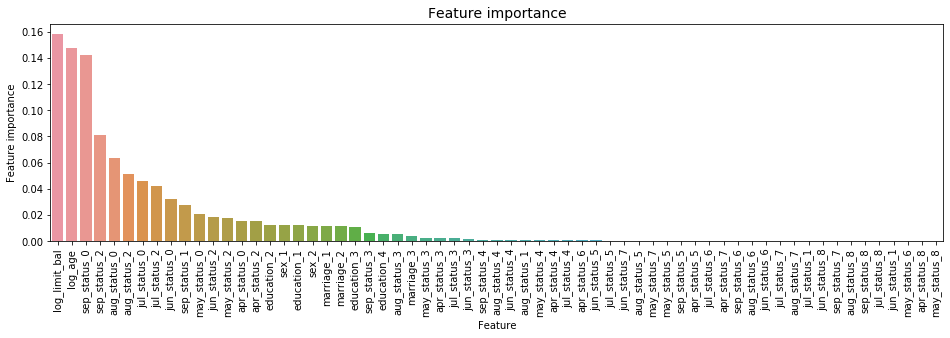

In [63]:
tmp = pd.DataFrame({'Feature':x.columns,'Feature importance':final_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize=(16,4))
plt.title('Feature importance',fontsize=14)
s= sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [64]:
metrics.recall_score(final_pred,y_test)

0.5030257186081695